# Churn Prediction - Eduardo Chaves

## Exploratory Data Anaysis (EDA)

In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

sns.set_style("whitegrid")

In [2]:
df = pd.read_csv('./assets/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [3]:
df.duplicated().sum()
# checking duplicates

0

In [4]:
df.info()
# overview of the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
df.describe()
# statistical overview of the numerical features

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [6]:
df.TotalCharges.info()
# was detected that TotalCharges isn't in a numerical data type

<class 'pandas.core.series.Series'>
RangeIndex: 7043 entries, 0 to 7042
Series name: TotalCharges
Non-Null Count  Dtype 
--------------  ----- 
7043 non-null   object
dtypes: object(1)
memory usage: 55.1+ KB


### Converting the TotalCharges' data type to a numeric one (float)

In [7]:
df.TotalCharges = pd.to_numeric(df.TotalCharges, downcast='float', errors='coerce')
# converting it to float data type, and leaving null values when it can't be converted (errors='coerce')

In [8]:
df.TotalCharges.dtype

dtype('float32')

In [9]:
df.TotalCharges.isnull().sum()
# we see that some values couldn't be converted, then becoming null ones

11

In [10]:
df = df.dropna()
# removing the nulls from the df

In [11]:
df.isnull().sum()
# now it's all clean from null values

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [12]:
df.describe()
# now with TotalCharges in a numerical dtype we can see its statistics

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300537
std,0.368844,24.545260,30.085974,2266.771484
min,0.000000,1.000000,18.250000,18.799999
25%,0.000000,9.000000,35.587500,401.449997
50%,0.000000,29.000000,70.350000,1397.475037
75%,0.000000,55.000000,89.862500,3794.737488
max,1.000000,72.000000,118.750000,8684.799805


### More analysis with graphs

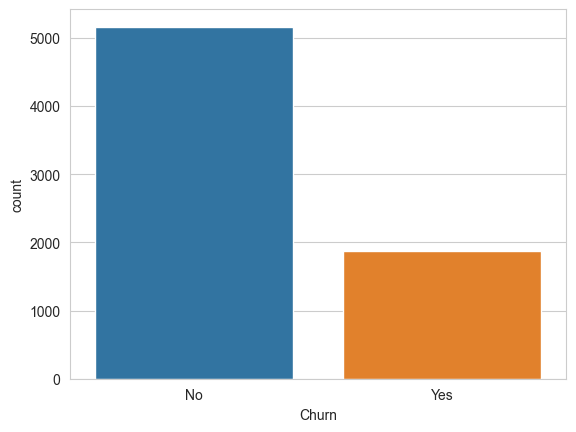

In [13]:
fig = sns.countplot(x='Churn', data=df)
plt.show()

fig = fig.figure
fig.savefig('./assets/graphs/churn.png', dpi=300, bbox_inches='tight')

 # here we see that our target feature is very unbalanced, and we'll handle
 # that problem in the future PIPELINE we'll make

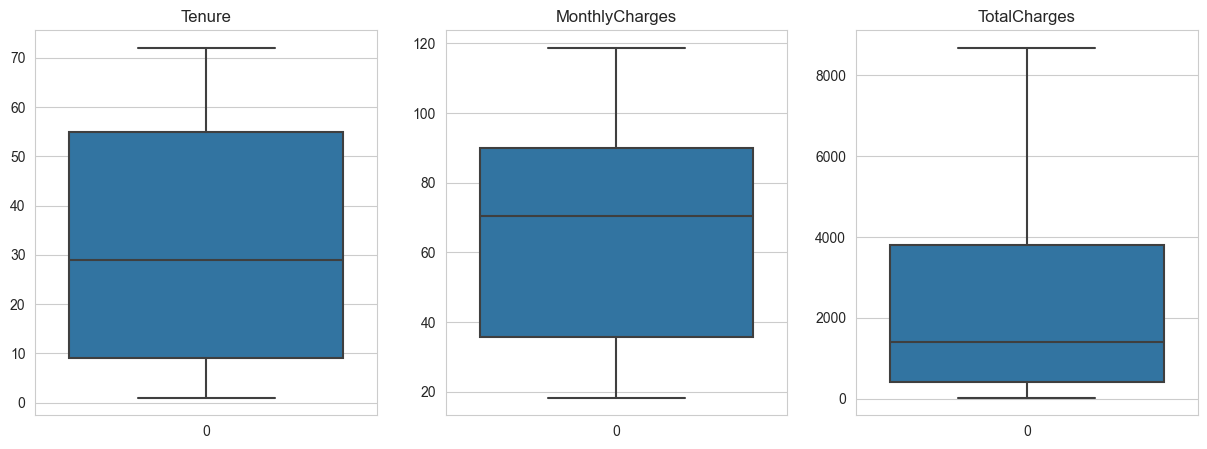

In [14]:
fig, ax = plt.subplots(1,3, figsize =(15,5))

sns.boxplot(df.tenure, ax=ax[0]).set(title='Tenure')
sns.boxplot(df.MonthlyCharges, ax=ax[1]).set(title='MonthlyCharges')
sns.boxplot(df.TotalCharges, ax=ax[2]).set(title='TotalCharges')
plt.show()

fig = fig.figure
fig.savefig('./assets/graphs/numeric-features.png', dpi=300, bbox_inches='tight')

# plotting boxplots to look for some stats in these features, as well as for hypothetical outliers

#### Visualizing the Demographic Features

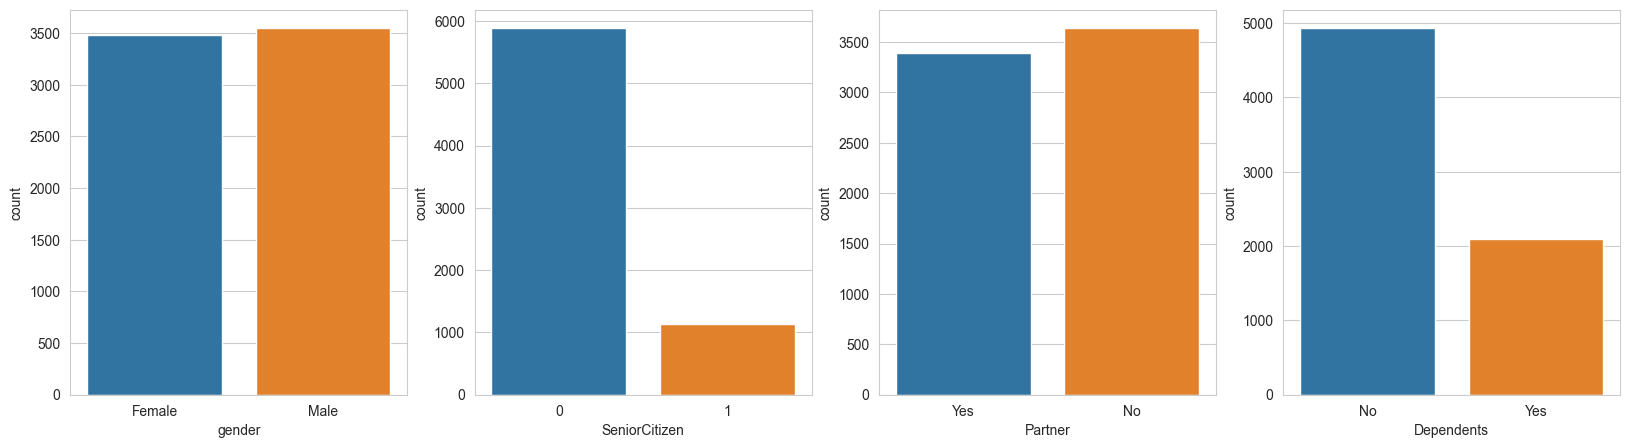

In [15]:
fig, ax = plt.subplots(1,4, figsize=(20,5))

sns.countplot(x= df.gender, ax=ax[0])
sns.countplot(x= df.SeniorCitizen, ax=ax[1])
sns.countplot(x= df.Partner, ax=ax[2])
sns.countplot(x= df.Dependents, ax=ax[3])
plt.show()

fig = fig.figure
fig.savefig('./assets/graphs/demographic-features.png', dpi=300, bbox_inches='tight')

#### Visualizing the Services' Features

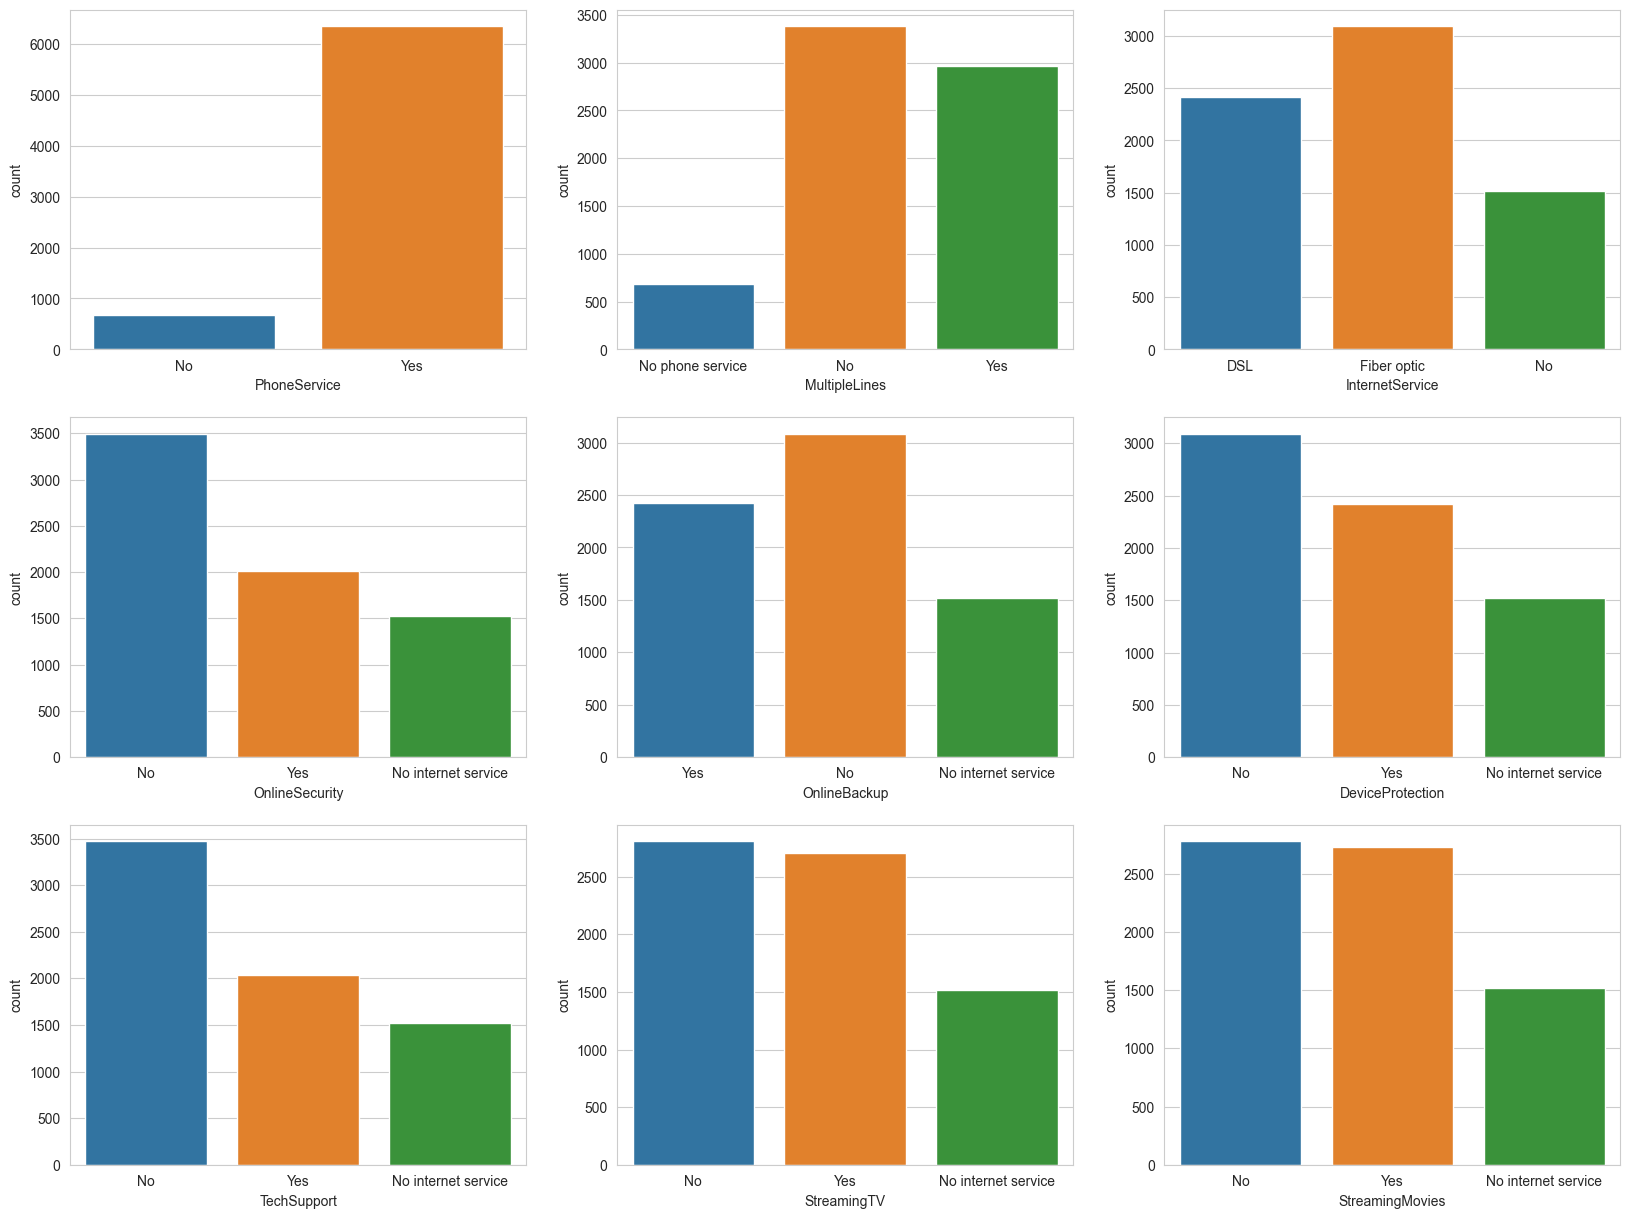

In [16]:
fig, ax = plt.subplots(3,3, figsize=(20,15))

sns.countplot(x= df.PhoneService, ax=ax[0,0])
sns.countplot(x= df.MultipleLines, ax=ax[0,1])
sns.countplot(x= df.InternetService, ax=ax[0,2])
sns.countplot(x= df.OnlineSecurity, ax=ax[1,0])
sns.countplot(x= df.OnlineBackup, ax=ax[1,1])
sns.countplot(x= df.DeviceProtection, ax=ax[1,2])
sns.countplot(x= df.TechSupport, ax=ax[2,0])
sns.countplot(x= df.StreamingTV, ax=ax[2,1])
sns.countplot(x= df.StreamingMovies, ax=ax[2,2])
plt.show()

fig = fig.figure
fig.savefig('./assets/graphs/services-features.png', dpi=300, bbox_inches='tight')

#### Visualizing the Contract's / Payment's Features

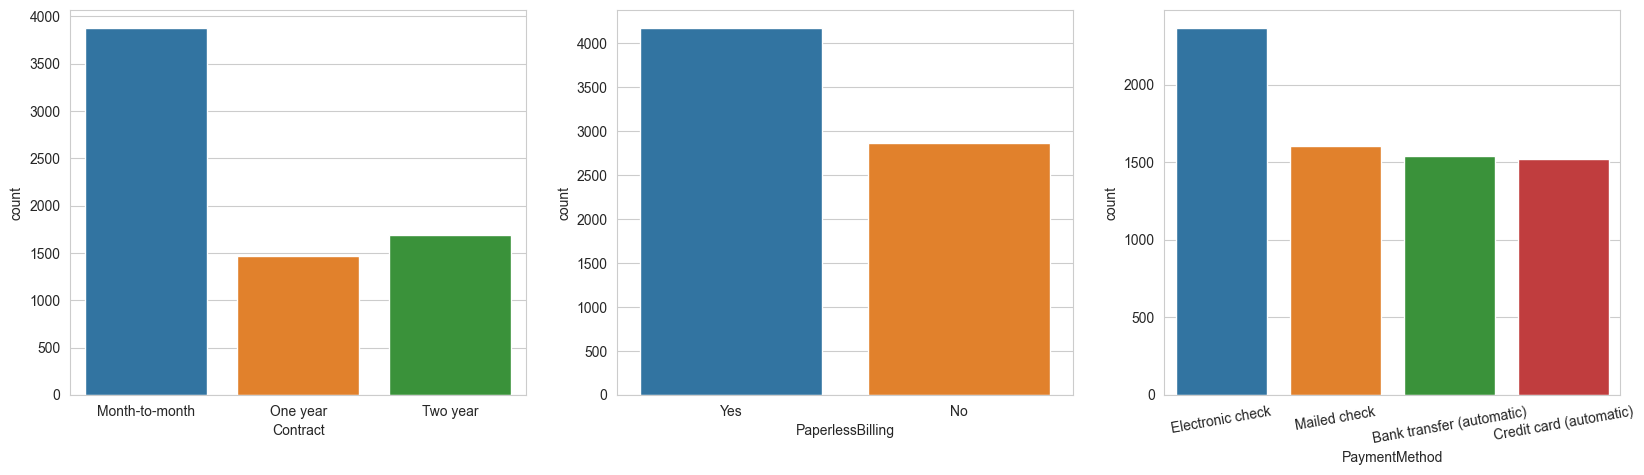

In [17]:
fig, ax = plt.subplots(1,3, figsize=(20,5))

sns.countplot(x= df.Contract, ax=ax[0])
sns.countplot(x= df.PaperlessBilling, ax=ax[1])
sns.countplot(x= df.PaymentMethod, ax=ax[2])

plt.xticks(rotation=10)
plt.show()

fig = fig.figure
fig.savefig('./assets/graphs/contract-features.png', dpi=300, bbox_inches='tight')

### Overview with Pandas Profilling

In [18]:
import pandas_profiling as pp

pp.ProfileReport(df, dark_mode=True)
# here we be able to see some more info about our data, especially the correlation between the features

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]